In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import random
import matplotlib.colors as colors
import os

###
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()



# Specifying Log Paths for Rand-K

# Helper Function to Parse JSON logs

In [2]:
def gather_loss2(losses,label,threshold = None, mean = False):
    loss_dict = {}
    acc_dict = {}
    data_dict = {}
    for i in range(len(label)):
        loss_dict[label[i]] = {
                              'final_loss':[]}
        
        acc_dict[label[i]] = {
                              'final_acc':[]}
    loss_list = []
    acc_list = []
    
    count = 0
    for path in losses:
        final_agent_epoch_loss = np.zeros(300)
        final_agent_epoch_acc = np.zeros(300)
        for agent in range(0,len(os.listdir(path))-1):
            agent_epoch_loss = []
            agent_epoch_acc = []
            

            for file in os.listdir(os.path.join(path,str(agent))):
                if not file.endswith('.json'):
                    continue
                with open(os.path.join(path,str(agent),file) ,'r') as f:
                    a = json.load(f)
                    for i in range(len(a)):
                        if('loss' in a[i].keys()):
                            if(a[i]['split'] == 'test'): #recording loss value of the local model for every epoch
                                if(a[i]['type'] == 'local_model'):
                                    agent_epoch_loss.append(a[i]['loss'])
                                    agent_epoch_acc.append(a[i]['top1'])
            #from IPython import embed;embed()
            final_agent_epoch_loss.resize(len(agent_epoch_loss))
            final_agent_epoch_loss += np.array(agent_epoch_loss)
            
            final_agent_epoch_acc.resize(len(agent_epoch_acc))
            final_agent_epoch_acc += np.array(agent_epoch_acc)

        #from IPython import embed;embed()
        final_agent_epoch_loss /= len(os.listdir(path))-1
        final_agent_epoch_acc /= len(os.listdir(path))-1
        loss_dict[label[count]]['final_loss'] = final_agent_epoch_loss
        acc_dict[label[count]]['final_acc'] = final_agent_epoch_acc
            #from IPython import embed;embed()
        
        count+=1
#     if(mean is True):
#         for i in range(len(label)):
#             loss_dict[label[i]]['min_loss'] = np.mean(loss_dict[label[i]]['min_loss'])
#             loss_dict[label[i]]['final_loss'] = np.mean(loss_dict[label[i]]['final_loss'])
            
#             acc_dict[label[i]]['max_acc'] = np.mean(acc_dict[label[i]]['max_acc'])
#             acc_dict[label[i]]['final_acc'] = np.mean(acc_dict[label[i]]['final_acc'])
                            
    return loss_dict,acc_dict

# Collec

In [3]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.99):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

In [7]:
%matplotlib inline
#93% random sparsification
sp_0p93_2048 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622834931_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9375__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622874052_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9375__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622911385_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9375__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622949284_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9375__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622986889_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9375__dataset-cifar10_unit-2048'
                ]

sp_0p87_1024 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622851513_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.875__dataset-cifar10_unit-1024',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622889851_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.875__dataset-cifar10_unit-1024',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622927413_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.875__dataset-cifar10_unit-1024',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622965158_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.875__dataset-cifar10_unit-1024',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1623002978_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.875__dataset-cifar10_unit-1024'
               
                ]

sp_0p75_512 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622860815_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.75__dataset-cifar10_unit-512',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622898212_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.75__dataset-cifar10_unit-512',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622936059_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.75__dataset-cifar10_unit-512',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622973525_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.75__dataset-cifar10_unit-512',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1623011501_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.75__dataset-cifar10_unit-512'
                ]

sp_0p50_256 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622866630_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.5__dataset-cifar10_unit-256',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622904104_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.5__dataset-cifar10_unit-256',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622942044_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.5__dataset-cifar10_unit-256',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622979522_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.5__dataset-cifar10_unit-256',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1623017607_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.5__dataset-cifar10_unit-256'
              ]

sp_0p0_128 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622870742_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.0__dataset-cifar10_unit-128',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622908149_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.0__dataset-cifar10_unit-128',
               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622946070_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.0__dataset-cifar10_unit-128',
              '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622983623_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.0__dataset-cifar10_unit-128',
              '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1623021654_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.0__dataset-cifar10_unit-128'
                ]


# #95% sparsification
# sp_0p95_2048 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621685931_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622350932_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622373673_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622396352_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622419884_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048']

# sp_0p90_1024 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621693377_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622358335_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622381037_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622403927_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622427396_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024']

# sp_0p80_512 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621699886_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622364921_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622387623_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622410934_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622436132_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512']

# sp_0p60_256 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621703643_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622368712_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622391410_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622414922_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622439989_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256']

# sp_0p20_128 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621706432_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622371545_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622394233_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622417739_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622442795_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128']

# #93.75% sparsification
# sp_0p93_2048 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622523687_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622547514_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622571389_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622595434_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621757828_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048']

# sp_0p87_1024 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621765281_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622555154_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622531242_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622578975_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622603537_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024'
#                ]

# sp_0p75_512 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622538194_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622562059_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622585877_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621772113_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622610476_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512']

# sp_0p50_256 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622542038_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622565914_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622589771_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621776031_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622614435_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256']

# sp_0p0_128 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622545155_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622569006_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
#              '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622592901_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
#              '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621779092_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
#              '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622617524_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128']

# #90% sparsification

# sp_0p90_2048 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622619918_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622640423_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622660673_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-2048',
#                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621708530_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-2048',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622681783_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-2048'
#                ]
# sp_0p80_1024 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621716284_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622627711_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622648122_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622668547_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-1024',
#                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622689575_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-1024'
#                ]

# sp_0p60_512 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621722482_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622633911_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622654244_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622674796_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-512',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622695761_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-512']

# sp_0p20_256 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621726195_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622637689_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622657954_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622678812_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-256',
#               '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622699459_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-256']

min_loss_99 = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_99 = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_99 = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_99 = np.array([0.0,0.0,0.0,0.0,0.0])

min_loss_95 = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_95 = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_95 = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_95 = np.array([0.0,0.0,0.0,0.0,0.0])

min_loss_93 = np.array([0.0,0.0,0.0,0.0,0.0])
max_acc_93 = np.array([0.0,0.0,0.0,0.0,0.0])
final_loss_93 = np.array([0.0,0.0,0.0,0.0,0.0])
final_acc_93 = np.array([0.0,0.0,0.0,0.0,0.0])

min_loss_90 = np.array([0.0,0.0,0.0,0.0])
max_acc_90 = np.array([0.0,0.0,0.0,0.0])
final_loss_90 = np.array([0.0,0.0,0.0,0.0])
final_acc_90 = np.array([0.0,0.0,0.0,0.0])


err_min_loss_99 = [[],[],[],[],[]]
err_max_acc_99 = [[],[],[],[],[]]
err_final_loss_99 = [[],[],[],[],[]]
err_final_acc_99 = [[],[],[],[],[]]

err_min_loss_95 = [[],[],[],[],[]]
err_max_acc_95 = [[],[],[],[],[]]
err_final_loss_95 = [[],[],[],[],[]]
err_final_acc_95 = [[],[],[],[],[]]

err_min_loss_93 = [[],[],[],[],[]]
err_max_acc_93 = [[],[],[],[],[]]
err_final_loss_93 = [[],[],[],[],[]]
err_final_acc_93 = [[],[],[],[],[]]

err_min_loss_90 = [[],[],[],[]]
err_max_acc_90 = [[],[],[],[]]
err_final_loss_90 = [[],[],[],[]]
err_final_acc_90 = [[],[],[],[]]

#trials = np.min([len(sp_0p99_2048),len(sp_0p98_1024),len(sp_0p96_512),len(sp_0p92_256),len(sp_0p84_128),len(sp_0p95_2048),len(sp_0p90_1024),len(sp_0p80_512),len(sp_0p60_256),len(sp_0p20_128)])
trials = 3
for i in range(0,trials):
    print(i)
    temp = [#sp_0p99_2048[i],sp_0p98_1024[i],sp_0p96_512[i],sp_0p92_256[i],sp_0p84_128[i],sp_0p95_2048[i],
            #sp_0p90_1024[i],sp_0p80_512[i],sp_0p60_256[i],sp_0p20_128[i], 
            sp_0p93_2048[i], sp_0p87_1024[i], sp_0p75_512[i], sp_0p50_256[i], sp_0p0_128[i], 
            #sp_0p90_2048[i], sp_0p80_1024[i], sp_0p60_512[i], 
            #sp_0p20_256[i]
           ]
    
    #temp = [sp_0p95_2048[i],sp_0p90_1024[i],sp_0p80_512[i],sp_0p60_256[i],sp_0p20_128[i]]
    labels = [#'sp_0p99_2048','sp_0p98_1024','sp_0p96_512','sp_0p92_256',
              #'sp_0p84_128','sp_0p95_2048','sp_0p90_1024',
             # 'sp_0p80_512','sp_0p60_256','sp_0p20_128',
             'sp_0p93_2048', 'sp_0p87_1024', 
            'sp_0p75_512', 'sp_0p50_256', 'sp_0p0_128',]
             #'sp_0p90_2048', 'sp_0p80_1024', 'sp_0p60_512', 
            #'sp_0p20_256']
    
    #labels = ['sp_0p95_2048','sp_0p90_1024','sp_0p80_512','sp_0p60_256','sp_0p20_128']
    loss_dict,acc_dict = gather_loss2(temp,labels,threshold=2.0)

#     for i in range(len(labels)):
#         acc_dict[labels[i]['final_loss']] = [x for x in acc_dict[labels[i]] if not np.isnan(x)]
#         loss_dict[labels[i]] = [x for x in loss_dict[labels[i]] if not np.isnan(x)]

    #stopat = len(loss_dict['sp_0p99_2048']['final_loss'])
    stopat = 300
    
#     min_loss_99 += np.array([min(loss_dict['sp_0p99_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p98_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p96_512']['final_loss'][:stopat]), min(loss_dict['sp_0p92_256']['final_loss'][:stopat]),
#                min(loss_dict['sp_0p84_128']['final_loss'][:stopat])][::-1])
#     temp1 = np.array([min(loss_dict['sp_0p99_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p98_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p96_512']['final_loss'][:stopat]), min(loss_dict['sp_0p92_256']['final_loss'][:stopat]),
#                min(loss_dict['sp_0p84_128']['final_loss'][:stopat])][::-1])
        
#     max_acc_99 += np.array([max(acc_dict['sp_0p99_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p98_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p96_512']['final_acc'][:stopat]), max(acc_dict['sp_0p92_256']['final_acc'][:stopat]),
#                max(acc_dict['sp_0p84_128']['final_acc'][:stopat])][::-1])
#     temp2 = np.array([max(acc_dict['sp_0p99_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p98_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p96_512']['final_acc'][:stopat]), max(acc_dict['sp_0p92_256']['final_acc'][:stopat]),
#                max(acc_dict['sp_0p84_128']['final_acc'][:stopat])][::-1])
    
    
#     final_loss_99 += np.array([loss_dict['sp_0p99_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p98_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p96_512']['final_loss'][:stopat][-1], loss_dict['sp_0p92_256']['final_loss'][:stopat][-1],
#                loss_dict['sp_0p84_128']['final_loss'][:stopat][-1]][::-1])
#     temp3 = np.array([loss_dict['sp_0p99_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p98_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p96_512']['final_loss'][:stopat][-1], loss_dict['sp_0p92_256']['final_loss'][:stopat][-1],
#                loss_dict['sp_0p84_128']['final_loss'][:stopat][-1]][::-1])

    
    
#     final_acc_99 += np.array([acc_dict['sp_0p99_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p98_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p96_512']['final_acc'][:stopat][-1], acc_dict['sp_0p92_256']['final_acc'][:stopat][-1], 
#                       acc_dict['sp_0p84_128']['final_acc'][:stopat][-1]][::-1])
    
#     temp4 = np.array([acc_dict['sp_0p99_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p98_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p96_512']['final_acc'][:stopat][-1], acc_dict['sp_0p92_256']['final_acc'][:stopat][-1], 
#                       acc_dict['sp_0p84_128']['final_acc'][:stopat][-1]][::-1])

#     ###########
#     min_loss_95 += np.array([min(loss_dict['sp_0p95_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p90_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p80_512']['final_loss'][:stopat]), min(loss_dict['sp_0p60_256']['final_loss'][:stopat]),
#                min(loss_dict['sp_0p20_128']['final_loss'][:stopat])][::-1])
#     temp5 = np.array([min(loss_dict['sp_0p95_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p90_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p80_512']['final_loss'][:stopat]), min(loss_dict['sp_0p60_256']['final_loss'][:stopat]),
#                min(loss_dict['sp_0p20_128']['final_loss'][:stopat])][::-1])

#     max_acc_95 += np.array([max(acc_dict['sp_0p95_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p90_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p80_512']['final_acc'][:stopat]), max(acc_dict['sp_0p60_256']['final_acc'][:stopat]),
#                max(acc_dict['sp_0p20_128']['final_acc'][:stopat])][::-1])
#     temp6 = np.array([max(acc_dict['sp_0p95_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p90_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p80_512']['final_acc'][:stopat]), max(acc_dict['sp_0p60_256']['final_acc'][:stopat]),
#                max(acc_dict['sp_0p20_128']['final_acc'][:stopat])][::-1])

#     final_loss_95 += np.array([loss_dict['sp_0p95_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p90_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p80_512']['final_loss'][:stopat][-1], loss_dict['sp_0p60_256']['final_loss'][:stopat][-1],
#                loss_dict['sp_0p20_128']['final_loss'][:stopat][-1]][::-1])
#     temp7 = np.array([loss_dict['sp_0p95_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p90_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p80_512']['final_loss'][:stopat][-1], loss_dict['sp_0p60_256']['final_loss'][:stopat][-1],
#                loss_dict['sp_0p20_128']['final_loss'][:stopat][-1]][::-1])

#     final_acc_95 += np.array([acc_dict['sp_0p95_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p90_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p80_512']['final_acc'][:stopat][-1], acc_dict['sp_0p60_256']['final_acc'][:stopat][-1], 
#                       acc_dict['sp_0p20_128']['final_acc'][:stopat][-1]][::-1])
#     temp8 = np.array([acc_dict['sp_0p95_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p90_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p80_512']['final_acc'][:stopat][-1], acc_dict['sp_0p60_256']['final_acc'][:stopat][-1], 
#                       acc_dict['sp_0p20_128']['final_acc'][:stopat][-1]][::-1])
    
    #############
    min_loss_93 += np.array([min(loss_dict['sp_0p93_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p87_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p75_512']['final_loss'][:stopat]), min(loss_dict['sp_0p50_256']['final_loss'][:stopat]),
               min(loss_dict['sp_0p0_128']['final_loss'][:stopat])][::-1])
    temp9 = np.array([min(loss_dict['sp_0p93_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p87_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p75_512']['final_loss'][:stopat]), min(loss_dict['sp_0p50_256']['final_loss'][:stopat]),
               min(loss_dict['sp_0p0_128']['final_loss'][:stopat])][::-1])

    max_acc_93 += np.array([max(acc_dict['sp_0p93_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p87_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p75_512']['final_acc'][:stopat]), max(acc_dict['sp_0p50_256']['final_acc'][:stopat]),
               max(acc_dict['sp_0p0_128']['final_acc'][:stopat])][::-1])
    temp10 = np.array([max(acc_dict['sp_0p93_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p87_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p75_512']['final_acc'][:stopat]), max(acc_dict['sp_0p50_256']['final_acc'][:stopat]),
               max(acc_dict['sp_0p0_128']['final_acc'][:stopat])][::-1])

    final_loss_93 += np.array([loss_dict['sp_0p93_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p87_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p75_512']['final_loss'][:stopat][-1], loss_dict['sp_0p50_256']['final_loss'][:stopat][-1],
               loss_dict['sp_0p0_128']['final_loss'][:stopat][-1]][::-1])
    temp11 = np.array([loss_dict['sp_0p93_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p87_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p75_512']['final_loss'][:stopat][-1], loss_dict['sp_0p50_256']['final_loss'][:stopat][-1],
               loss_dict['sp_0p0_128']['final_loss'][:stopat][-1]][::-1])

    final_acc_93 += np.array([acc_dict['sp_0p93_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p87_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p75_512']['final_acc'][:stopat][-1], acc_dict['sp_0p50_256']['final_acc'][:stopat][-1], 
                      acc_dict['sp_0p0_128']['final_acc'][:stopat][-1]][::-1])
    temp12 = np.array([acc_dict['sp_0p93_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p87_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p75_512']['final_acc'][:stopat][-1], acc_dict['sp_0p50_256']['final_acc'][:stopat][-1], 
                      acc_dict['sp_0p0_128']['final_acc'][:stopat][-1]][::-1])
    ############
    
#     min_loss_90 += np.array([min(loss_dict['sp_0p90_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p80_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p60_512']['final_loss'][:stopat]), min(loss_dict['sp_0p20_256']['final_loss'][:stopat])][::-1])
#     temp13 = np.array([min(loss_dict['sp_0p93_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p87_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p75_512']['final_loss'][:stopat]), min(loss_dict['sp_0p50_256']['final_loss'][:stopat])
#                ][::-1])

#     max_acc_90 += np.array([max(acc_dict['sp_0p90_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p80_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p60_512']['final_acc'][:stopat]), max(acc_dict['sp_0p20_256']['final_acc'][:stopat])
#                ][::-1])
#     temp14 = np.array([max(acc_dict['sp_0p90_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p80_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p60_512']['final_acc'][:stopat]), max(acc_dict['sp_0p20_256']['final_acc'][:stopat])
#                ][::-1])

#     final_loss_90 += np.array([loss_dict['sp_0p90_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p80_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p60_512']['final_loss'][:stopat][-1], loss_dict['sp_0p20_256']['final_loss'][:stopat][-1]][::-1])
#     temp15 = np.array([loss_dict['sp_0p90_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p80_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p60_512']['final_loss'][:stopat][-1], loss_dict['sp_0p20_256']['final_loss'][:stopat][-1]][::-1])

#     final_acc_90 += np.array([acc_dict['sp_0p90_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p80_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p60_512']['final_acc'][:stopat][-1], acc_dict['sp_0p20_256']['final_acc'][:stopat][-1]][::-1])
#     temp16 = np.array([acc_dict['sp_0p90_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p80_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p60_512']['final_acc'][:stopat][-1], acc_dict['sp_0p20_256']['final_acc'][:stopat][-1]][::-1])
    
    
    for k in range(0,5): #adding data for error bars
#         err_min_loss_99[k].append(temp1[k])
#         err_max_acc_99[k].append(temp2[k])
#         err_final_loss_99[k].append(temp3[k])
#         err_final_acc_99[k].append(temp4[k])
        
#         err_min_loss_95[k].append(temp5[k])
#         err_max_acc_95[k].append(temp6[k])
#         err_final_loss_95[k].append(temp7[k])
#         err_final_acc_95[k].append(temp8[k])
        
        err_min_loss_93[k].append(temp9[k])
        err_max_acc_93[k].append(temp10[k])
        err_final_loss_93[k].append(temp11[k])
        err_final_acc_93[k].append(temp12[k])
    
#     for l in range(0,4):
#         err_min_loss_90[l].append(temp13[l])
#         err_max_acc_90[l].append(temp14[l])
#         err_final_loss_90[l].append(temp15[l])
#         err_final_acc_90[l].append(temp16[l])

# min_loss_99 /= float(trials)
# max_acc_99 /= float(trials)
# final_loss_99 /= float(trials)
# final_acc_99 /= float(trials)

# min_loss_95 /= float(trials)
# max_acc_95 /= float(trials)
# final_loss_95 /= float(trials)
# final_acc_95 /= float(trials)
 
min_loss_93 /= float(trials)
max_acc_93 /= float(trials)
final_loss_93 /= float(trials)
final_acc_93 /= float(trials)

# min_loss_90 /= float(trials)
# max_acc_90 /= float(trials)
# final_loss_90 /= float(trials)
# final_acc_90 /= float(trials)

############################
###PLOTS
    


0
1
2


In [12]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["128", "256", "512", "1024", "2048"]
x.add_row(min_loss_99.tolist())
x.add_row(min_loss_95.tolist())
x.add_row(min_loss_93.tolist())
x.add_row([min_loss_90.tolist()[0],min_loss_90.tolist()[1],min_loss_90.tolist()[2],min_loss_90.tolist()[3],min_loss_90.tolist()[3]])

print(x)

+--------------------+-------------------+--------------------+--------------------+--------------------+
|        128         |        256        |        512         |        1024        |        2048        |
+--------------------+-------------------+--------------------+--------------------+--------------------+
|        0.0         |        0.0        |        0.0         |        0.0         |        0.0         |
|        0.0         |        0.0        |        0.0         |        0.0         |        0.0         |
| 1.2631721852382025 | 1.209103776661555 | 1.1817446412245434 | 1.1700860821684202 | 1.1696480340679487 |
|        0.0         |        0.0        |        0.0         |        0.0         |        0.0         |
+--------------------+-------------------+--------------------+--------------------+--------------------+


In [13]:
len(loss_dict['sp_0p87_1024']['final_loss'])

278

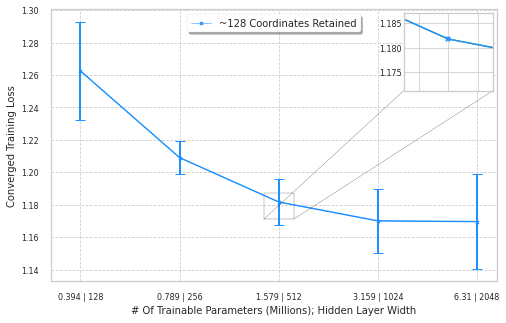

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1,figsize=(8,5))
plt.style.use('seaborn-paper')
sns.set_style("whitegrid")

x = ['0.394 | 128','0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']
x2 = ['0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']

ll = 0.001

# #99%
# ax.plot(x, min_loss_99,color='crimson' ,markevery=True, marker = '^',markersize=4, label = '~20 Coordinates Retained',linewidth = 0.5 )
# err_min_loss_99a = [mean_confidence_interval(err_min_loss_99[l]) for l in range(len(min_loss_99))]
# (_, caps, _) = ax.errorbar(x, min_loss_99, yerr=err_min_loss_99a, capsize=5, elinewidth=2, color='crimson')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('crimson')
    
    
# #95%    
# ax.plot(x,min_loss_95,color='mediumseagreen',markevery=True, marker = 'o',markersize=4, label='~100 Coordinates Retained' ,linewidth = 0.5 )
# err_min_loss_95a = [mean_confidence_interval(err_min_loss_95[l]) for l in range(len(min_loss_95))]
# (_, caps, _) = ax.errorbar(x, min_loss_95, yerr=err_min_loss_95a, capsize=5, elinewidth=2, color='mediumseagreen')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('mediumseagreen')
    
#93%
ax.plot(x,min_loss_93,color='dodgerblue',markevery=True, marker = 'X',markersize=4, label='~128 Coordinates Retained' ,linewidth = 0.5 )
err_min_loss_93a = [mean_confidence_interval(err_min_loss_93[l]) for l in range(len(min_loss_93))]
(_, caps, _) = ax.errorbar(x, min_loss_93, yerr=err_min_loss_93a, capsize=5, elinewidth=2, color='dodgerblue')

for cap in caps:
    cap.set_markeredgewidth(1)
    cap.set_color('dodgerblue')

# #90%
# ax.plot(x2,min_loss_90,color='rebeccapurple',markevery=True, marker = 'D',markersize=4, label='~200 Coordinates Retained', linewidth = 0.5 )
# err_min_loss_90a = [mean_confidence_interval(err_min_loss_90[l]) for l in range(len(min_loss_90))]
# (_, caps, _) = ax.errorbar(x2, min_loss_90, yerr=err_min_loss_90a, capsize=5, elinewidth=2, color='rebeccapurple')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('rebeccapurple')


    
ax.legend(prop={'size': 10},
          ncol=1, fancybox=True, shadow=True, loc = 'upper center')


ax.set_ylabel('Converged Training Loss',fontsize=10)
ax.set_xlabel('# Of Trainable Parameters (Millions); Hidden Layer Width',fontsize=10)
#ax[0].yaxis.set_ticks([1.10,1.12,1.14,1.16,1.18,1.20,1.22,1.24,1.26,1.28,1.30,1.32,1.34])



# #99%    
# ax[1].plot(x, max_acc_99,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = '~20 Coordinates Retained',linewidth = 0.5 )
# err_max_acc_99a = [mean_confidence_interval(err_max_acc_99[l]) for l in range(len(err_max_acc_99))]
# (_, caps, _) = ax[1].errorbar(x, max_acc_99, yerr=err_max_acc_99a, capsize=5, elinewidth=2,color='crimson')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('crimson')
    
# #95%   
# ax[1].plot(x, max_acc_95,'-',color='mediumseagreen', markevery=True, marker = 'o',markersize=4,label = '~100 Coordinates Retained',linewidth = 0.5 )
# err_max_acc_95a = [mean_confidence_interval(err_max_acc_95[l]) for l in range(len(err_max_acc_95))]
# (_, caps, _) = ax[1].errorbar(x, max_acc_95, yerr=err_max_acc_95a, capsize=5, elinewidth=2,color='mediumseagreen')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('mediumseagreen')

# #93%
# ax[1].plot(x,max_acc_93,color='dodgerblue',markevery=True, marker = 'X',markersize=4, label='~128 Coordinates Retained',linewidth = 0.5 )
# err_max_acc_93a = [mean_confidence_interval(err_max_acc_93[l]) for l in range(len(max_acc_93))]
# (_, caps, _) = ax[1].errorbar(x, max_acc_93, yerr=err_max_acc_93a, capsize=5, elinewidth=2, color='dodgerblue')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('dodgerblue')

# #90%
# ax[1].plot(x2,max_acc_90,color='rebeccapurple',markevery=True, marker = 'X',markersize=4, label='~128 Coordinates Retained',linewidth = 0.01 )
# err_max_acc_90a = [mean_confidence_interval(err_max_acc_90[l]) for l in range(len(max_acc_90))]
# (_, caps, _) = ax[1].errorbar(x2, max_acc_90, yerr=err_max_acc_90a, capsize=5, elinewidth=2, color='rebeccapurple')

# for cap in caps:
#     cap.set_markeredgewidth(1)
#     cap.set_color('rebeccapurple')
    
    
ax.grid(True, linestyle='-')



#zoom in
ax.set_xlim([-0.3,4.2])
data_points = np.array([[min_loss_99[0],min_loss_99[1],min_loss_99[2],min_loss_99[3],min_loss_99[4]],
               [min_loss_95[0],min_loss_95[1],min_loss_95[2],min_loss_95[3],min_loss_95[4]],
                [min_loss_93[0],min_loss_93[1],min_loss_93[2],min_loss_93[3],min_loss_93[4]],
                 [0,min_loss_90[0],min_loss_90[1],min_loss_90[2],min_loss_90[3]]])
x =[0,1,2,3,4]    
               
axins1 = zoomed_inset_axes(ax, zoom = 3, loc = 'upper right')
axins1.grid(True)

#axins1.style.use('seaborn-whitegrid')

axins1.plot(x,data_points[0])
axins1.plot(x,data_points[0], marker='^',color='crimson')
axins1.plot(x,data_points[1])
axins1.plot(x,data_points[1], marker='o',color='mediumseagreen')
axins1.plot(x,data_points[2])
axins1.plot(x,data_points[2], marker='X',color='dodgerblue')
axins1.plot(x,data_points[3])
axins1.plot(x,data_points[3], marker='D',color='rebeccapurple')
# SPECIFY THE LIMITS
x1, x2, y1, y2 = 1.85,2.15,1.17113784288788,1.1870135385440825
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

# FOR ANNOTATING THE 3 POINTS WE ARE ZOOMING ON
# for dpt,ypt in zip(datapts.T[3],[25]*4):
#     if dpt > y1 and dpt < y2:
#         axins1.annotate("%.2f"%(dpt),xy=(ypt,dpt),textcoords='data')
        
# IF SET TO TRUE, TICKS ALONG 
# THE TWO AXIS WILL BE VISIBLE
plt.xticks(visible=False)
plt.yticks(visible=True)

axins1.tick_params(axis="y",direction="in", pad=1.8)
mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="0.1")
ax.grid(True, linestyle='--')

plt.savefig('randk.pdf')

In [33]:
data_points

[[1.2622590846729278,
  1.2161339729094505,
  1.1832336385440825,
  1.17322966527462,
  1.1759324803781508],
 [1.2587086586093903,
  1.214414593896866,
  1.1784519188022613,
  1.1585804848623273,
  1.1536638860392572],
 [1.2623580142402648,
  1.20885592243433,
  1.1783839617204666,
  1.1591734064269066,
  1.1517546329760553],
 [1.2115986594772339,
  1.176116884288788,
  1.1561264002633096,
  1.1475276601028443]]

In [27]:
a

# Running For only 100 epochs

In [23]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

0
1
2
3
4


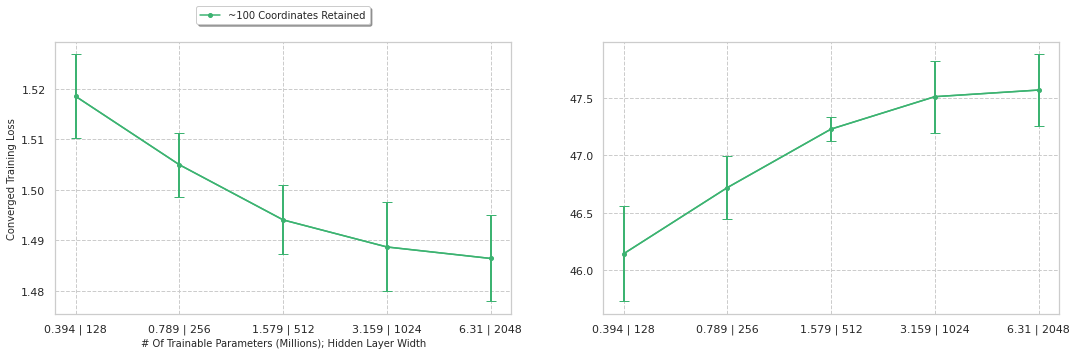

0
1
2
3
4


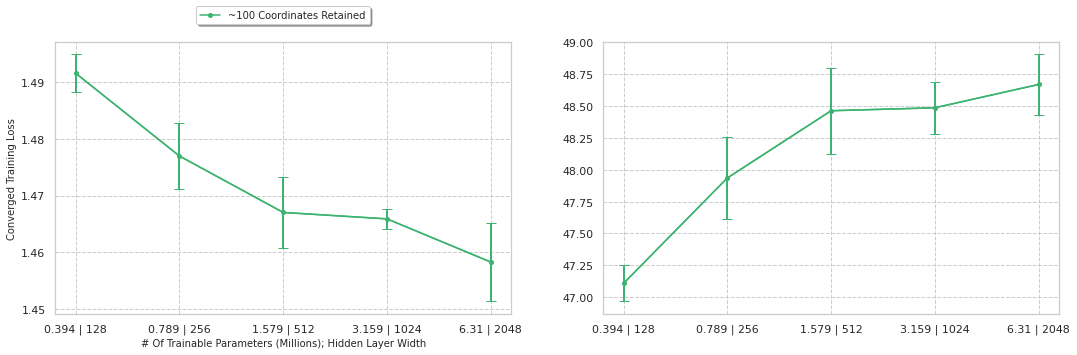

0
1
2
3
4


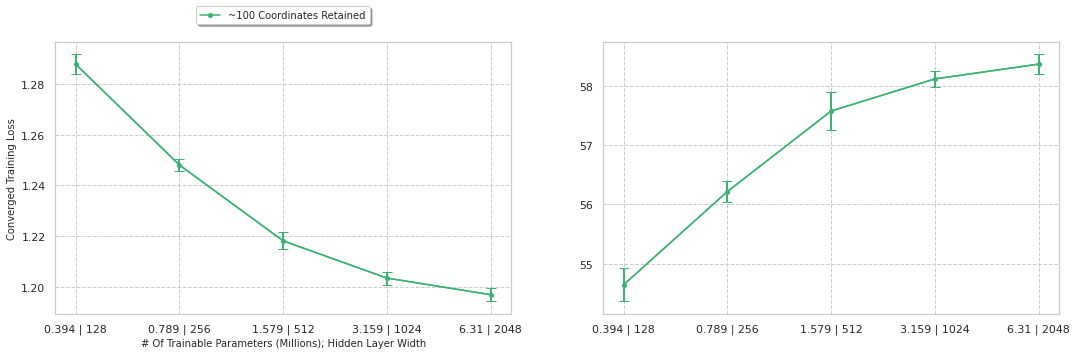

0
1
2
3
4


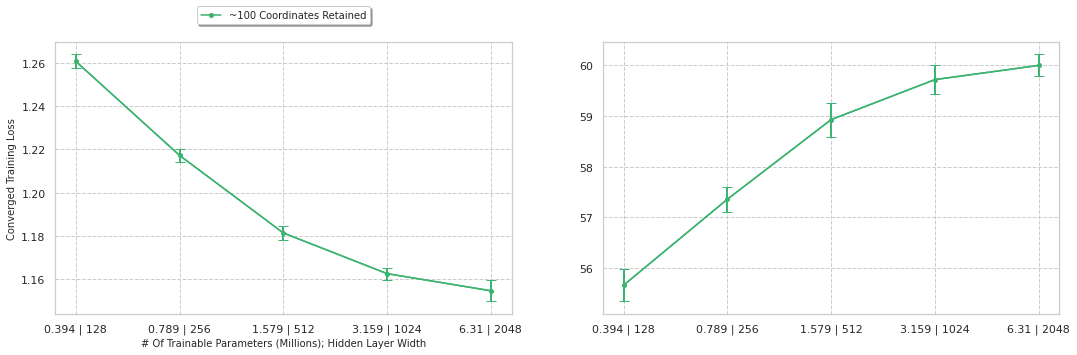

In [58]:
for xe in [50,100,150,200]:
    fig, ax = plt.subplots(1, 2,figsize=(18,5))
    
    sp_0p99_2048 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621665989_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.99__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622444914_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.99__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622464263_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.99__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622483664_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.99__dataset-cifar10_unit-2048',
                '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622503697_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.99__dataset-cifar10_unit-2048'
                ]

    sp_0p98_1024 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621672959_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.98__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622451375_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.98__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622470746_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.98__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622490229_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.98__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622510587_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.98__dataset-cifar10_unit-1024'
                    ]

    sp_0p96_512 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621678553_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.96__dataset-cifar10_unit-512',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622456946_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.96__dataset-cifar10_unit-512',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622476344_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.96__dataset-cifar10_unit-512',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622495814_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.96__dataset-cifar10_unit-512',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622516149_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.96__dataset-cifar10_unit-512'
                    ]

    sp_0p92_256 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621682047_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.92__dataset-cifar10_unit-256',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622460320_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.92__dataset-cifar10_unit-256',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622479709_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.92__dataset-cifar10_unit-256',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622499429_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.92__dataset-cifar10_unit-256',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622519517_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.92__dataset-cifar10_unit-256'
                  ]

    sp_0p84_128 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621684227_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.84__dataset-cifar10_unit-128',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622462507_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.84__dataset-cifar10_unit-128',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622481914_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.84__dataset-cifar10_unit-128',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622501884_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.84__dataset-cifar10_unit-128',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622521708_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.84__dataset-cifar10_unit-128'
                    ]


    #95% sparsification
    sp_0p95_2048 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621685931_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622350932_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622373673_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622396352_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622419884_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048']

    sp_0p90_1024 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621693377_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622358335_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622381037_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622403927_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622427396_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024']

    sp_0p80_512 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621699886_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622364921_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622387623_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622410934_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622436132_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512']

    sp_0p60_256 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621703643_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622368712_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622391410_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622414922_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622439989_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256']

    sp_0p20_128 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621706432_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622371545_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622394233_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622417739_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1622442795_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128']

    #93.75% sparsification
    sp_0p93_2048 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622523687_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622547514_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622571389_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622595434_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621757828_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048']

    sp_0p87_1024 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621765281_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622555154_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622531242_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622578975_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024',
                    '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622603537_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024'
                   ]

    sp_0p75_512 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622538194_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622562059_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622585877_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621772113_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622610476_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512']

    sp_0p50_256 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622542038_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
                   '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622565914_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622589771_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621776031_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622614435_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256']

    sp_0p0_128 = ['/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622545155_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
                  '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622569006_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622592901_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621779092_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128',
                 '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/1622617524_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128']


    min_loss_99 = np.array([0.0,0.0,0.0,0.0,0.0])
    max_acc_99 = np.array([0.0,0.0,0.0,0.0,0.0])
    final_loss_99 = np.array([0.0,0.0,0.0,0.0,0.0])
    final_acc_99 = np.array([0.0,0.0,0.0,0.0,0.0])

    min_loss_95 = np.array([0.0,0.0,0.0,0.0,0.0])
    max_acc_95 = np.array([0.0,0.0,0.0,0.0,0.0])
    final_loss_95 = np.array([0.0,0.0,0.0,0.0,0.0])
    final_acc_95 = np.array([0.0,0.0,0.0,0.0,0.0])

    err_min_loss_99 = [[],[],[],[],[]]
    err_max_acc_99 = [[],[],[],[],[]]
    err_final_loss_99 = [[],[],[],[],[]]
    err_final_acc_99 = [[],[],[],[],[]]

    err_min_loss_95 = [[],[],[],[],[]]
    err_max_acc_95 = [[],[],[],[],[]]
    err_final_loss_95 = [[],[],[],[],[]]
    err_final_acc_95 = [[],[],[],[],[]]



    #trials = np.min([len(sp_0p99_2048),len(sp_0p98_1024),len(sp_0p96_512),len(sp_0p92_256),len(sp_0p84_128),len(sp_0p95_2048),len(sp_0p90_1024),len(sp_0p80_512),len(sp_0p60_256),len(sp_0p20_128)])
    trials = len(sp_0p95_2048)
    for i in range(0,trials):
        #temp = [sp_0p99_2048[i],sp_0p98_1024[i],sp_0p96_512[i],sp_0p92_256[i],sp_0p84_128[i]]
        temp = [sp_0p95_2048[i],sp_0p90_1024[i],sp_0p80_512[i],sp_0p60_256[i],sp_0p20_128[i]]
        #labels = ['sp_0p99_2048','sp_0p98_1024','sp_0p96_512','sp_0p92_256','sp_0p84_128']
        labels = ['sp_0p95_2048','sp_0p90_1024','sp_0p80_512','sp_0p60_256','sp_0p20_128']
        loss_dict,acc_dict = gather_loss2(temp,labels,threshold=2.0)

    #     for i in range(len(labels)):
    #         acc_dict[labels[i]['final_loss']] = [x for x in acc_dict[labels[i]] if not np.isnan(x)]
    #         loss_dict[labels[i]] = [x for x in loss_dict[labels[i]] if not np.isnan(x)]

        stopat = xe


    #     min_loss_99 += np.array([min(loss_dict['sp_0p99_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p98_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p96_512']['final_loss'][:stopat]), min(loss_dict['sp_0p92_256']['final_loss'][:stopat]),
    #                min(loss_dict['sp_0p84_128']['final_loss'][:stopat])][::-1])
    #     temp1 = np.array([min(loss_dict['sp_0p99_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p98_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p96_512']['final_loss'][:stopat]), min(loss_dict['sp_0p92_256']['final_loss'][:stopat]),
    #                min(loss_dict['sp_0p84_128']['final_loss'][:stopat])][::-1])

    #     max_acc_99 += np.array([max(acc_dict['sp_0p99_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p98_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p96_512']['final_acc'][:stopat]), max(acc_dict['sp_0p92_256']['final_acc'][:stopat]),
    #                max(acc_dict['sp_0p84_128']['final_acc'][:stopat])][::-1])
    #     temp2 = np.array([max(acc_dict['sp_0p99_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p98_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p96_512']['final_acc'][:stopat]), max(acc_dict['sp_0p92_256']['final_acc'][:stopat]),
    #                max(acc_dict['sp_0p84_128']['final_acc'][:stopat])][::-1])


    #     final_loss_99 += np.array([loss_dict['sp_0p99_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p98_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p96_512']['final_loss'][:stopat][-1], loss_dict['sp_0p92_256']['final_loss'][:stopat][-1],
    #                loss_dict['sp_0p84_128']['final_loss'][:stopat][-1]][::-1])
    #     temp3 = np.array([loss_dict['sp_0p99_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p98_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p96_512']['final_loss'][:stopat][-1], loss_dict['sp_0p92_256']['final_loss'][:stopat][-1],
    #                loss_dict['sp_0p84_128']['final_loss'][:stopat][-1]][::-1])



    #     final_acc_99 += np.array([acc_dict['sp_0p99_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p98_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p96_512']['final_acc'][:stopat][-1], acc_dict['sp_0p92_256']['final_acc'][:stopat][-1], 
    #                       acc_dict['sp_0p84_128']['final_acc'][:stopat][-1]][::-1])

    #     temp4 = np.array([acc_dict['sp_0p99_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p98_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p96_512']['final_acc'][:stopat][-1], acc_dict['sp_0p92_256']['final_acc'][:stopat][-1], 
    #                       acc_dict['sp_0p84_128']['final_acc'][:stopat][-1]][::-1])

        ###########
        min_loss_95 += np.array([min(loss_dict['sp_0p95_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p90_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p80_512']['final_loss'][:stopat]), min(loss_dict['sp_0p60_256']['final_loss'][:stopat]),
                   min(loss_dict['sp_0p20_128']['final_loss'][:stopat])][::-1])
        temp5 = np.array([min(loss_dict['sp_0p95_2048']['final_loss'][:stopat]), min(loss_dict['sp_0p90_1024']['final_loss'][:stopat]), min(loss_dict['sp_0p80_512']['final_loss'][:stopat]), min(loss_dict['sp_0p60_256']['final_loss'][:stopat]),
                   min(loss_dict['sp_0p20_128']['final_loss'][:stopat])][::-1])

        max_acc_95 += np.array([max(acc_dict['sp_0p95_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p90_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p80_512']['final_acc'][:stopat]), max(acc_dict['sp_0p60_256']['final_acc'][:stopat]),
                   max(acc_dict['sp_0p20_128']['final_acc'][:stopat])][::-1])
        temp6 = np.array([max(acc_dict['sp_0p95_2048']['final_acc'][:stopat]), max(acc_dict['sp_0p90_1024']['final_acc'][:stopat]), max(acc_dict['sp_0p80_512']['final_acc'][:stopat]), max(acc_dict['sp_0p60_256']['final_acc'][:stopat]),
                   max(acc_dict['sp_0p20_128']['final_acc'][:stopat])][::-1])

        final_loss_95 += np.array([loss_dict['sp_0p95_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p90_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p80_512']['final_loss'][:stopat][-1], loss_dict['sp_0p60_256']['final_loss'][:stopat][-1],
                   loss_dict['sp_0p20_128']['final_loss'][:stopat][-1]][::-1])
        temp7 = np.array([loss_dict['sp_0p95_2048']['final_loss'][:stopat][-1], loss_dict['sp_0p90_1024']['final_loss'][:stopat][-1], loss_dict['sp_0p80_512']['final_loss'][:stopat][-1], loss_dict['sp_0p60_256']['final_loss'][:stopat][-1],
                   loss_dict['sp_0p20_128']['final_loss'][:stopat][-1]][::-1])

        final_acc_95 += np.array([acc_dict['sp_0p95_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p90_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p80_512']['final_acc'][:stopat][-1], acc_dict['sp_0p60_256']['final_acc'][:stopat][-1], 
                          acc_dict['sp_0p20_128']['final_acc'][:stopat][-1]][::-1])
        temp8 = np.array([acc_dict['sp_0p95_2048']['final_acc'][:stopat][-1], acc_dict['sp_0p90_1024']['final_acc'][:stopat][-1], acc_dict['sp_0p80_512']['final_acc'][:stopat][-1], acc_dict['sp_0p60_256']['final_acc'][:stopat][-1], 
                          acc_dict['sp_0p20_128']['final_acc'][:stopat][-1]][::-1])

        for k in range(0,5): #adding data for error bars
    #         err_min_loss_99[k].append(temp1[k])
    #         err_max_acc_99[k].append(temp2[k])
    #         err_final_loss_99[k].append(temp3[k])
    #         err_final_acc_99[k].append(temp4[k])

            err_min_loss_95[k].append(temp5[k])
            err_max_acc_95[k].append(temp6[k])
            err_final_loss_95[k].append(temp7[k])
            err_final_acc_95[k].append(temp8[k])

    # min_loss_99 /= float(trials)
    # max_acc_99 /= float(trials)
    # final_loss_99 /= float(trials)
    # final_acc_99 /= float(trials)

    min_loss_95 /= float(trials)
    max_acc_95 /= float(trials)
    final_loss_95 /= float(trials)
    final_acc_95 /= float(trials)

    ############################
    ###PLOTS

    x = ['0.394 | 128','0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']
    x2 = ['0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']

    #99%
    # fig, ax = plt.subplots(1, 2,figsize=(18,5))
    # ax[0].plot(x, min_loss_99,color='crimson' ,markevery=True, marker = '^',markersize=10, label = '~20 Coordinates Retained')
    # err_min_loss_99 = [mean_confidence_interval(err_min_loss_99[l]) for l in range(len(min_loss_99))]
    # (_, caps, _) = ax[0].errorbar(x, min_loss_99, yerr=err_min_loss_99, capsize=5, elinewidth=2, color='crimson')

    # for cap in caps:
    #     cap.set_markeredgewidth(1)
    #     cap.set_color('crimson')


    #95%    
    ax[0].plot(x,min_loss_95,color='mediumseagreen',markevery=True, marker = 'o',markersize=4, label='~100 Coordinates Retained' )
    err_min_loss_951 = [mean_confidence_interval(err_min_loss_95[l]) for l in range(len(min_loss_95))]
    (_, caps, _) = ax[0].errorbar(x, min_loss_95, yerr=err_min_loss_951, capsize=5, elinewidth=2, color='mediumseagreen')

    for cap in caps:
        cap.set_markeredgewidth(1)
        cap.set_color('mediumseagreen')

    #93%
    # ax[0].plot(x2,min_loss_93,color='dodgerblue',markevery=True, marker = 'X',markersize=10, label='~200 Coordinates Retained' )
    # err_min_loss_93 = [mean_confidence_interval(err_min_loss_93[l]) for l in range(len(min_loss_93))]
    # (_, caps, _) = ax[1].errorbar(x, min_loss_93, yerr=err_min_loss_93, capsize=5, elinewidth=2, color='crimson')

    # for cap in caps:
    #     cap.set_markeredgewidth(1)
    #     cap.set_color('crimson')

    #90%
    # ax[0].plot(x,min_loss_93,color='rebeccapurple',markevery=True, marker = 'D',markersize=10, label='~128 Coordinates Retained' )
    # err_min_loss_90 = [mean_confidence_interval(err_min_loss_90[l]) for l in range(len(min_loss_90))]
    # (_, caps, _) = ax[1].errorbar(x, min_loss_90, yerr=err_min_loss_90, capsize=5, elinewidth=2, color='crimson')

    # for cap in caps:
    #     cap.set_markeredgewidth(1)
    #     cap.set_color('crimson')



    ax[0].legend(loc='upper center', prop={'size': 10}, bbox_to_anchor=(0.5, 1.15),
              ncol=2, fancybox=True, shadow=True)
    ax[0].set_ylabel('Converged Training Loss',fontsize=10)
    ax[0].set_xlabel('# Of Trainable Parameters (Millions); Hidden Layer Width',fontsize=10)
    #ax[0].yaxis.set_ticks([1.10,1.12,1.14,1.16,1.18,1.20,1.22,1.24,1.26,1.28,1.30,1.32,1.34])



    #99%    
    # ax[1].plot(x, max_acc_99,'-',color='crimson', markevery=True, marker = 'o',markersize=4,label = '~20 Coordinates Retained')
    # err_max_acc_99 = [mean_confidence_interval(err_max_acc_99[l]) for l in range(len(err_max_acc_99))]
    # (_, caps, _) = ax[1].errorbar(x, max_acc_99, yerr=err_max_acc_99, capsize=5, elinewidth=2,color='crimson')

    # for cap in caps:
    #     cap.set_markeredgewidth(1)
    #     cap.set_color('crimson')

    #95%   
    ax[1].plot(x, max_acc_95,'-',color='mediumseagreen', markevery=True, marker = 'o',markersize=4,label = '~100 Coordinates Retained')
    err_max_acc_951 = [mean_confidence_interval(err_max_acc_95[l]) for l in range(len(err_max_acc_95))]
    (_, caps, _) = ax[1].errorbar(x, max_acc_95, yerr=err_max_acc_951, capsize=5, elinewidth=2,color='mediumseagreen')

    for cap in caps:
        cap.set_markeredgewidth(1)
        cap.set_color('mediumseagreen')

    ax[0].grid(True, linestyle='--')
    ax[1].grid(True, linestyle='--')

    plt.show()